In [713]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score



In [714]:
dta = pd.read_csv('C:/Users/Acer/student.mat.csv',delimiter=";")

In [715]:
dta.shape

(395, 33)

In [716]:
dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [717]:
dta.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [718]:
dta['G3'].median()

11.0

In [719]:
# omitting G1 and G2 as G3 is a funtion of G1 And G2


dta.drop(['G1','G2'],axis=1,inplace=True)

In [720]:
dta.G3.mean()

10.415189873417722

In [721]:
dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [722]:
dta.shape

(395, 31)

In [723]:
dta.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

In [724]:
# exploring data
dta.groupby('sex').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
sex,,,,,,,,,,,,,,
F,16.730769,2.668269,2.485577,1.408654,2.278846,0.302885,3.894231,3.009615,3.028846,1.254808,1.956731,3.365385,6.216346,9.966346
M,16.657754,2.839572,2.561497,1.491979,1.764706,0.368984,4.000000,3.486631,3.197861,1.732620,2.663102,3.764706,5.144385,10.914439


In [725]:
dta.groupby('studytime').mean()

,age,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
studytime,,,,,,,,,,,,,
1,16.647619,2.657143,2.438095,1.590476,0.523810,3.876190,3.438095,3.142857,1.761905,2.761905,3.800000,5.761905,10.047619
2,16.702020,2.737374,2.570707,1.414141,0.308081,3.934343,3.217172,3.176768,1.449495,2.267677,3.419192,6.277778,10.171717
3,16.923077,2.907692,2.676923,1.323077,0.230769,4.153846,3.092308,2.892308,1.200000,1.815385,3.723077,4.538462,11.400000
4,16.296296,2.814815,2.111111,1.444444,0.037037,3.777778,2.925926,3.000000,1.296296,1.777778,3.185185,4.148148,11.259259


In [726]:
np.percentile(dta.G3,60)

12.0

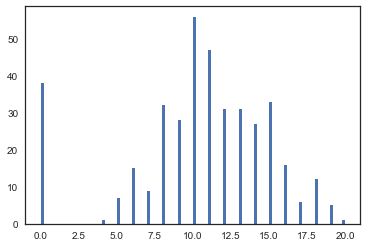

In [727]:
plt.hist(dta.G3,bins=100)
plt.show()

In [728]:
import seaborn as sns

In [729]:
# classifying G3 into 1 and 0 where 1 is greater than 12 and 0 is less than 12

dta['G']=np.where((dta.G3)>12,1,0)

In [730]:
dta['G'].mean()

0.33164556962025316

In [731]:
# exploring the data

dta.groupby('school').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G
school,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.489971,0.340974
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,9.847826,0.260870


In [732]:
dta.drop(['address','famsize'],axis=1).head()

,school,sex,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G
0,GP,F,18,A,4,4,at_home,teacher,course,mother,...,no,4,3,4,1,1,3,6,6,0
1,GP,F,17,T,1,1,at_home,other,course,father,...,no,5,3,3,1,1,3,4,6,0
2,GP,F,15,T,1,1,at_home,other,other,mother,...,no,4,3,2,2,3,3,10,10,0
3,GP,F,15,T,4,2,health,services,home,mother,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,T,3,3,other,other,home,father,...,no,4,3,2,1,2,5,4,10,0


In [733]:
dta.groupby('sex')['G'].value_counts()


sex  G
F    0    145
     1     63
M    0    119
     1     68
Name: G, dtype: int64

In [734]:
dta.groupby('school')['G'].value_counts()

school  G
GP      0    230
        1    119
MS      0     34
        1     12
Name: G, dtype: int64

In [735]:
dta.groupby('studytime')['G'].value_counts()

studytime  G
1          0     71
           1     34
2          0    142
           1     56
3          0     36
           1     29
4          0     15
           1     12
Name: G, dtype: int64

In [736]:
dta.groupby('Pstatus')['G'].value_counts()

Pstatus  G
A        0     27
         1     14
T        0    237
         1    117
Name: G, dtype: int64

In [737]:
dta.groupby('Fedu')['G'].value_counts()

Fedu  G
0     0     1
      1     1
1     0    65
      1    17
2     0    77
      1    38
3     0    69
      1    31
4     0    52
      1    44
Name: G, dtype: int64

In [738]:
dta.groupby('failures')['G'].value_counts()

failures  G
0         0    190
          1    122
1         0     43
          1      7
2         0     15
          1      2
3         0     16
Name: G, dtype: int64

In [739]:
dta.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.161579,-0.123216
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.217147,0.225414
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.152457,0.156748
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.117142,-0.105761
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.097820,0.092106
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.360415,-0.237310
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.051363,0.019792
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.011307,-0.009934
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.132791,-0.097986
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.054660,-0.084700


In [740]:
dta.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,10,15,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,11,0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,6,6,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,19,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,15,1


In [741]:
dta.groupby('traveltime')['G'].value_counts()

traveltime  G
1           0    163
            1     94
2           0     77
            1     30
3           0     17
            1      6
4           0      7
            1      1
Name: G, dtype: int64

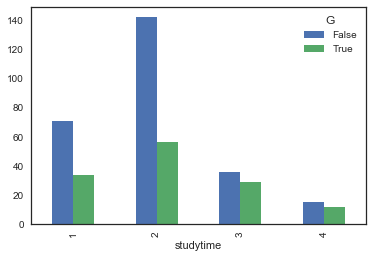

In [742]:
pd.crosstab(dta.studytime,dta.G.astype(bool)).plot(kind='bar')
plt.show()

In [743]:
# make dummie
#normalise
# linear or logistic regression

In [744]:
y=dta['G']

In [745]:
# dummifying and normalizing the attributes

In [746]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [747]:
address_dummies=pd.get_dummies(dta.address,prefix='address').iloc[:,1:]
dta=pd.concat([dta,address_dummies],axis=1)

In [748]:
dta.shape

(395, 33)

In [749]:
dta.groupby('famsize')['G'].value_counts()

famsize  G
GT3      0    191
         1     90
LE3      0     73
         1     41
Name: G, dtype: int64

In [750]:
school_dummies=pd.get_dummies(dta.school,prefix='school').iloc[:,1:]
dta=pd.concat([dta,school_dummies],axis=1)

In [751]:
Pstatus_dummies=pd.get_dummies(dta.Pstatus,prefix='Pstatus').iloc[:,1:]
dta=pd.concat([dta,dta.Pstatus],axis=1)

In [752]:
sex_dummies=pd.get_dummies(dta.sex,prefix='sex').iloc[:,1:]
dta=pd.concat([dta,sex_dummies],axis=1)

In [753]:
nursery_dummies=pd.get_dummies(dta.nursery,prefix='nursery').iloc[:,1:]
dta=pd.concat([dta,nursery_dummies],axis=1)

In [754]:
Medu_dummies=pd.get_dummies(dta.Medu,prefix='Medu').iloc[:,1:]
dta=pd.concat([dta,Medu_dummies],axis=1)

In [755]:
Fedu_dummies=pd.get_dummies(dta.Fedu,prefix='Fedu').iloc[:,1:]
dta=pd.concat([dta,Fedu_dummies],axis=1)

In [756]:
Mjob_dummies=pd.get_dummies(dta.Mjob,prefix='Mjob').iloc[:,1:]
dta=pd.concat([dta,Mjob_dummies],axis=1)

In [757]:
Fjob_dummies=pd.get_dummies(dta.address,prefix='Fjob').iloc[:,1:]
dta=pd.concat([dta,Fjob_dummies],axis=1)

In [758]:
reason_dummies=pd.get_dummies(dta.reason,prefix='reason').iloc[:,1:]
dta=pd.concat([dta,reason_dummies],axis=1)

In [759]:
guardian_dummies=pd.get_dummies(dta.guardian,prefix='guadian').iloc[:,1:]
dta=pd.concat([dta,guardian_dummies],axis=1)

In [760]:
dta.sex_M.value_counts()

0    208
1    187
Name: sex_M, dtype: int64

In [761]:
traveltime_dummies=pd.get_dummies(dta.traveltime,prefix='traveltime').iloc[:,1:]
dta=pd.concat([dta,traveltime_dummies],axis=1)

In [762]:
studytime_dummies=pd.get_dummies(dta.studytime,prefix='studytime').iloc[:,1:]
dta=pd.concat([dta,studytime_dummies],axis=1)

In [763]:
failures_dummies=pd.get_dummies(dta.failures,prefix='failures').iloc[:,1:]
dta=pd.concat([dta,failures_dummies],axis=1)

In [764]:
schoolsup_dummies=pd.get_dummies(dta.schoolsup,prefix='schoolsup').iloc[:,1:]
dta=pd.concat([dta,schoolsup_dummies],axis=1)

In [765]:
famsup_dummies=pd.get_dummies(dta.famsup,prefix='famsup').iloc[:,1:]
dta=pd.concat([dta,famsup_dummies],axis=1)

In [766]:
paid_dummies=pd.get_dummies(dta.paid,prefix='paid').iloc[:,1:]
dta=pd.concat([dta,paid_dummies],axis=1)

In [767]:
activities_dummies=pd.get_dummies(dta.activities,prefix='activities').iloc[:,1:]
dta=pd.concat([dta,activities_dummies],axis=1)

In [768]:
higher_dummies=pd.get_dummies(dta.higher,prefix='higher').iloc[:,1:]
dta=pd.concat([dta,higher_dummies],axis=1)

In [769]:
internet_dummies=pd.get_dummies(dta.internet,prefix='internet').iloc[:,1:]
dta=pd.concat([dta,internet_dummies],axis=1)

In [770]:
romantic_dummies=pd.get_dummies(dta.romantic,prefix='romantic').iloc[:,1:]
dta=pd.concat([dta,romantic_dummies],axis=1)

In [771]:
famrel_dummies=pd.get_dummies(dta.famrel,prefix='famrel').iloc[:,1:]
dta=pd.concat([dta,famrel_dummies],axis=1)

In [772]:
freetime_dummies=pd.get_dummies(dta.freetime,prefix='freetime').iloc[:,1:]
dta=pd.concat([dta,freetime_dummies],axis=1)

In [773]:
Dalc_dummies=pd.get_dummies(dta.Dalc,prefix='Dalc').iloc[:,1:]
dta=pd.concat([dta,Dalc_dummies],axis=1)

In [774]:
Walc_dummies=pd.get_dummies(dta.Walc,prefix='Walc').iloc[:,1:]
dta=pd.concat([dta,Walc_dummies],axis=1)

In [775]:
health_dummies=pd.get_dummies(dta.health,prefix='health').iloc[:,1:]
dta=pd.concat([dta,health_dummies],axis=1)

In [776]:
dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,0,0,0,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,0,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,1,0,0,0,1,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,0,0,0,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,1,0,0,0,0,0,0,1


In [777]:
goout_dummies=pd.get_dummies(dta.health,prefix='goout').iloc[:,1:]
dta=pd.concat([dta,goout_dummies],axis=1)

In [778]:
dta.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc_4,Walc_5,health_2,health_3,health_4,health_5,goout_2,goout_3,goout_4,goout_5
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,1,0,0,0,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,1,0,0,0,1,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,0,1,0,0,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,0,0,0,1,0,0,0,1


In [779]:
dta.shape

(395, 95)

In [780]:
X=dta

In [781]:
y=dta['G']

In [782]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 95 columns):
school               395 non-null object
sex                  395 non-null object
age                  395 non-null int64
address              395 non-null object
famsize              395 non-null object
Pstatus              395 non-null object
Medu                 395 non-null int64
Fedu                 395 non-null int64
Mjob                 395 non-null object
Fjob                 395 non-null object
reason               395 non-null object
guardian             395 non-null object
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
schoolsup            395 non-null object
famsup               395 non-null object
paid                 395 non-null object
activities           395 non-null object
nursery              395 non-null object
higher               395 non-null object
internet             395 non-null object

In [783]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: G, dtype: int32

In [784]:
# droping all original data and keeping only dummies

dta.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health','G3'],axis=1,inplace=True)



## Linear Regression

In [785]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [786]:
dta.head()

,age,absences,G,address_U,school_MS,sex_M,nursery_yes,Medu_1,Medu_2,Medu_3,...,Walc_4,Walc_5,health_2,health_3,health_4,health_5,goout_2,goout_3,goout_4,goout_5
0,18,6,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,17,4,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,15,10,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15,2,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,16,4,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [787]:
dta.drop(['G'],axis=1,inplace=True)

In [788]:

print(dta.columns)

Index(['age', 'absences', 'address_U', 'school_MS', 'sex_M', 'nursery_yes',
       'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3',
       'Fedu_4', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_U', 'reason_home', 'reason_other', 'reason_reputation',
       'guadian_mother', 'guadian_other', 'traveltime_2', 'traveltime_3',
       'traveltime_4', 'studytime_2', 'studytime_3', 'studytime_4',
       'failures_1', 'failures_2', 'failures_3', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'activities_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5',
       'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5', 'Dalc_2',
       'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5',
       'health_2', 'health_3', 'health_4', 'health_5', 'goout_2', 'goout_3',
       'goout_4', 'goout_5'],
      dtype='object')



model=    x_label=G~ age + absences + address_U + school_MS +  sex_M + nursery_yes + \
         Medu_1 +Medu_2 + Medu_3 + Medu_4 + Fedu_1 + Fedu_2 + Fedu_3 \
        + Fedu_4 + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher \
        + Fjob_U + reason_home + reason_other + reason_reputation \
        + guadian_mother + guadian_other + traveltime_2 + traveltime_3 \
        + traveltime_4 + studytime_2 + studytime_3 + studytime_4 \
        + failures_1 + failures_2 + failures_3 + schoolsup_yes + famsup_yes \
        + paid_yes + activities_yes + higher_yes + internet_yes \
        + romantic_yes + famrel_2 + famrel_3 + famrel_4 + famrel_5\
        + freetime_2 + freetime_3 + freetime_4 + freetime_5 +Dalc_2 \
        + Dalc_3 + Dalc_4 + Dalc_5 + Walc_2 + Walc_3 + Walc_4 +Walc_5 \
        +health_2 + health_3 + health_4 + health_5 + goout_2 + goout_3 \
        +goout_4 + goout_5
    
    lm = smf.ols(formula= x_label,data = dta).fit()
    
    return lm , Y_label #
    

In [789]:
lm.intercept_

1.9984014443252818e-15

In [790]:
import statsmodels.formula.api as smf

In [791]:
model=smf.ols(formula='y~ age + absences + address_U + school_MS +  sex_M + nursery_yes + \
         Medu_1 +Medu_2 + Medu_3 + Medu_4 + Fedu_1 + Fedu_2 + Fedu_3 \
        + Fedu_4 + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher \
        + Fjob_U + reason_home + reason_other + reason_reputation \
        + guadian_mother + guadian_other + traveltime_2 + traveltime_3 \
        + traveltime_4 + studytime_2 + studytime_3 + studytime_4 \
        + failures_1 + failures_2 + failures_3 + schoolsup_yes + famsup_yes \
        + paid_yes + activities_yes + higher_yes + internet_yes \
        + romantic_yes + famrel_2 + famrel_3 + famrel_4 + famrel_5\
        + freetime_2 + freetime_3 + freetime_4 + freetime_5 +Dalc_2 \
        + Dalc_3 + Dalc_4 + Dalc_5 + Walc_2 + Walc_3 + Walc_4 +Walc_5 \
        +health_2 + health_3 + health_4 + health_5 + goout_2 + goout_3 \
        +goout_4 + goout_5',data=dta).fit()

In [792]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2.216
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           5.55e-06
Time:                        19:58:38   Log-Likelihood:                -197.83
No. Observations:                 395   AIC:                             515.7
Df Residuals:                     335   BIC:                             754.4
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0744      0.633      1.697      0.091      -0.171       2.320
age                  -0.0223      0.024     -0.941      0.347      -0.069       0.024
absences             -0.0017      0.003     -0.546      0.585      -0.008       0.005
address_U             0.0292      0.032      0.921      0.358      -0.033       0.092
school_MS             0.0161      0.087      0.185      0.853      -0.155       0.187
sex_M                 0.1014      0.055      1.859      0.064      -0.006       0.209
nursery_yes           0.0386      0.059      0.651      0.516      -0.078       0.155
Medu_1               -0.5033      0.274     -1.836      0.067      -1.043       0.036
Medu_2               -0.4464      0.274     -1.630      0.104      -0.985       0.092
Medu_3               -0.3934      0.276     -1.427      0.155      -0.936       0.149
Medu_4               -0.2751      0.284     -0.969      0.333      -0.833       0.283
Fedu_1               -0.0093      0.327     -0.028      0.977      -0.652       0.634
Fedu_2               -0.0083      0.327     -0.025      0.980      -0.651       0.634
Fedu_3               -0.0599      0.328     -0.183      0.855      -0.704       0.585
Fedu_4                0.0247      0.330      0.075      0.940      -0.625       0.675
Mjob_health           0.0300      0.121      0.249      0.803      -0.207       0.267
Mjob_other           -0.0889      0.076     -1.166      0.244      -0.239       0.061
Mjob_services        -0.0346      0.085     -0.405      0.686      -0.203       0.134
Mjob_teacher         -0.1865      0.112     -1.667      0.096      -0.407       0.034
Fjob_U                0.0292      0.032      0.921      0.358      -0.033       0.092
reason_home           0.0677      0.061      1.111      0.267      -0.052       0.187
reason_other          0.1020      0.087      1.172      0.242      -0.069       0.273
reason_reputation     0.1073      0.063      1.716      0.087      -0.016       0.230
guadian_mother       -0.0190      0.058     -0.326      0.745      -0.133       0.096
guadian_other         0.0135      0.109      0.124      0.901      -0.200       0.227
traveltime_2         -0.0467      0.055     -0.843      0.400      -0.156       0.062
traveltime_3          0.0626      0.108      0.580      0.563      -0.150       0.275
traveltime_4         -0.1450      0.181     -0.800      0.424      -0.502       0.212
studytime_2          -0.0270      0.060     -0.451      0.652      -0.145       0.091
studytime_3           0.1189      0.083      1.439      0.151      -0.044       0.282
studytime_4           0.0827      0.107      0.771      0.441      -0.128       0.294
failures_1           -0.1366      0.077     -1.777      0.077      -0.288       0.015
failures_2           -0.1437      0.123     -1.164      0.245      -0.386

In [793]:
model.conf_int()

,0,1
Intercept,-0.170823,2.319668
age,-0.068966,0.024327
absences,-0.007968,0.004504
address_U,-0.033169,0.091581
school_MS,-0.154975,0.187117
sex_M,-0.005874,0.208753
nursery_yes,-0.077983,0.155108
Medu_1,-1.042632,0.035963
Medu_2,-0.985046,0.092227
Medu_3,-0.935734,0.148921


In [794]:
# omitting attributes with more that 5% p_value


dta_2=dta.drop(['age','absences','address_U','school_MS','nursery_yes','Medu_4','Fedu_1','Fedu_2','Fedu_3','Fedu_4','Mjob_health',           
                'Mjob_other','Mjob_services','Fjob_U','guadian_mother','guadian_other','traveltime_2','traveltime_3','traveltime_4','studytime_2',
           'studytime_4','paid_yes','romantic_yes','famrel_2','famrel_3','famrel_4','famrel_5','freetime_2','freetime_3','freetime_4',
           'freetime_5','Dalc_2','Dalc_3','Dalc_4','Dalc_5','Walc_5','reason_home','reason_other','reason_reputation',
               'activities_yes','internet_yes','Walc_2','health_2','goout_2','sex_M','studytime_3','failures_1','failures_2','failures_3',
               'famsup_yes','higher_yes','Walc_3','health_4','health_5','goout_4','goout_5'],axis=1)

In [795]:
dta_2.shape

(395, 8)

In [796]:
model_2=smf.ols(formula='y~ Medu_1 +Medu_2 + Medu_3 \
        + Mjob_teacher \
        +  schoolsup_yes \
        + Walc_4\
      +goout_3 ',data=dta_2).fit()

In [797]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     9.338
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           1.05e-10
Time:                        19:58:40   Log-Likelihood:                -232.10
No. Observations:                 395   AIC:                             480.2
Df Residuals:                     387   BIC:                             512.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6374      0.051     12.418      0.000       0.536       0.738
Medu_1           -0.3989      0.076     -5.283      0.000      -0.547      -0.250
Medu_2           -0.2730      0.065     -4.171      0.000      -0.402      -0.144
Medu_3           -0.2301      0.065     -3.546      0.000      -0.358      -0.103
Mjob_teacher     -0.1755      0.074     -2.363      0.019      -0.322      -0.029
schoolsup_yes    -0.2715      0.066     -4.091      0.000      -0.402      -0.141
Walc_4           -0.2077      0.067     -3.108      0.002      -0.339      -0.076
goout_3          -0.1288      0.053     -2.422      0.016      -0.233      -0.024
==============================================================================
Omnibus:                      176.264   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.016
Skew:                           0.533   Prob(JB):                     2.04e-09
Kurtosis:                       1.861   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [798]:
dta_2.corr()

,Medu_1,Medu_2,Medu_3,Mjob_teacher,schoolsup_yes,Walc_4,health_3,goout_3
Medu_1,1.000000,-0.248876,-0.242342,-0.173842,0.008097,-0.013084,0.091211,0.091211
Medu_2,-0.248876,1.000000,-0.343478,-0.246392,0.046450,-0.108312,0.072179,0.072179
Medu_3,-0.242342,-0.343478,1.000000,-0.190409,0.003793,0.108318,-0.066697,-0.066697
Mjob_teacher,-0.173842,-0.246392,-0.190409,1.000000,-0.095745,0.032239,-0.040123,-0.040123
schoolsup_yes,0.008097,0.046450,0.003793,-0.095745,1.000000,-0.035682,0.004494,0.004494
Walc_4,-0.013084,-0.108312,0.108318,0.032239,-0.035682,1.000000,-0.085155,-0.085155
health_3,0.091211,0.072179,-0.066697,-0.040123,0.004494,-0.085155,1.000000,1.000000
goout_3,0.091211,0.072179,-0.066697,-0.040123,0.004494,-0.085155,1.000000,1.000000


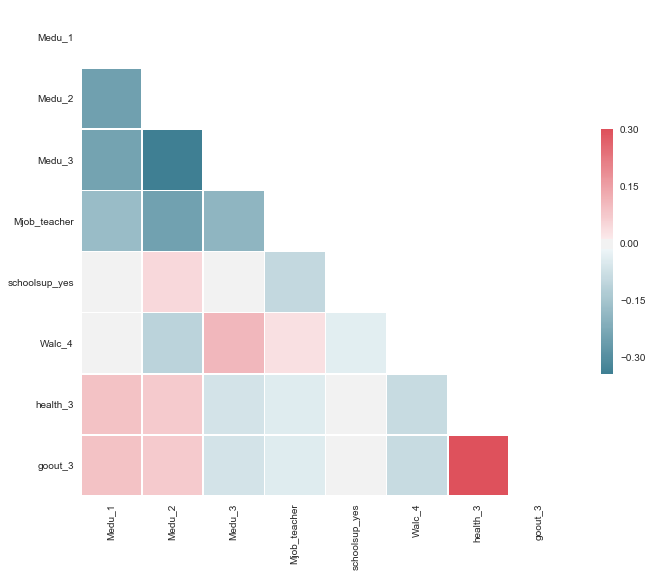

In [799]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = dta_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


model_2.summary()

In [800]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     9.338
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           1.05e-10
Time:                        19:58:45   Log-Likelihood:                -232.10
No. Observations:                 395   AIC:                             480.2
Df Residuals:                     387   BIC:                             512.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6374      0.051     12.418      0.000       0.536       0.738
Medu_1           -0.3989      0.076     -5.283      0.000      -0.547      -0.250
Medu_2           -0.2730      0.065     -4.171      0.000      -0.402      -0.144
Medu_3           -0.2301      0.065     -3.546      0.000      -0.358      -0.103
Mjob_teacher     -0.1755      0.074     -2.363      0.019      -0.322      -0.029
schoolsup_yes    -0.2715      0.066     -4.091      0.000      -0.402      -0.141
Walc_4           -0.2077      0.067     -3.108      0.002      -0.339      -0.076
goout_3          -0.1288      0.053     -2.422      0.016      -0.233      -0.024
==============================================================================
Omnibus:                      176.264   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.016
Skew:                           0.533   Prob(JB):                     2.04e-09
Kurtosis:                       1.861   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression

In [801]:
from patsy import dmatrices
y_lo,x_lo= dmatrices('y~Medu_1 + Medu_2 + Medu_3 + Mjob_teacher + schoolsup_yes + Walc_4 + health_3 + goout_3',dta_2,return_type='dataframe')

In [802]:
## using the best attributes for logistic regression and evaluating the model


dta_2.columns.tolist()

['Medu_1',
 'Medu_2',
 'Medu_3',
 'Mjob_teacher',
 'schoolsup_yes',
 'Walc_4',
 'health_3',
 'goout_3']

In [803]:
x_lo.columns

Index(['Intercept', 'Medu_1', 'Medu_2', 'Medu_3', 'Mjob_teacher',
       'schoolsup_yes', 'Walc_4', 'health_3', 'goout_3'],
      dtype='object')

In [804]:
y_lo=np.ravel(y_lo)

In [805]:
model = LogisticRegression()

In [806]:
model=model.fit(x_lo,y_lo)

In [807]:
model.score(x_lo,y_lo)

0.70379746835443036

In [808]:
y_lo.mean()

0.33164556962025316

In [809]:
# 33% of students get score more than 12 in grade 3

# model score is 70.3% 


In [810]:
X_train,X_test,y_train,y_test= train_test_split(x_lo,y_lo,test_size=0.3,random_state=0)


model2 = LogisticRegression()

model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [811]:
predicted = model2.predict(X_test)
predicted.mean()

predicted.shape

(119,)

In [812]:
predicted.sum()

17.0

In [813]:
17/119

0.14285714285714285

In [814]:
119-17

102

In [815]:
102/119

0.8571428571428571

In [816]:
probs=model2.predict_proba(X_test)
probs

array([[ 0.51856972,  0.48143028],
       [ 0.58548986,  0.41451014],
       [ 0.38340722,  0.61659278],
       [ 0.51856972,  0.48143028],
       [ 0.38340722,  0.61659278],
       [ 0.86237468,  0.13762532],
       [ 0.8368161 ,  0.1631839 ],
       [ 0.38340722,  0.61659278],
       [ 0.71984312,  0.28015688],
       [ 0.38340722,  0.61659278],
       [ 0.71984312,  0.28015688],
       [ 0.92641369,  0.07358631],
       [ 0.51856972,  0.48143028],
       [ 0.92595811,  0.07404189],
       [ 0.58548986,  0.41451014],
       [ 0.38340722,  0.61659278],
       [ 0.62509396,  0.37490604],
       [ 0.80261166,  0.19738834],
       [ 0.38340722,  0.61659278],
       [ 0.60261196,  0.39738804],
       [ 0.62509396,  0.37490604],
       [ 0.71984312,  0.28015688],
       [ 0.58548986,  0.41451014],
       [ 0.86237468,  0.13762532],
       [ 0.86237468,  0.13762532],
       [ 0.38340722,  0.61659278],
       [ 0.58548986,  0.41451014],
       [ 0.72427845,  0.27572155],
       [ 0.38340722,

In [817]:
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.714285714286
0.715224358974


In [818]:
## accuarcy is 71%
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[74  6]
 [28 11]]
             precision    recall  f1-score   support

        0.0       0.73      0.93      0.81        80
        1.0       0.65      0.28      0.39        39

avg / total       0.70      0.71      0.68       119



##  cross validation of model

In [819]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
scores=cross_val_score(LogisticRegression(),x_lo,y_lo,scoring='accuracy',cv=10)
scores,scores.mean()

(array([ 0.80487805,  0.775     ,  0.75      ,  0.75      ,  0.64102564,
         0.74358974,  0.61538462,  0.53846154,  0.69230769,  0.71794872]),
 0.70285959974984369)

In [820]:

## mean model score is 70.2%


## data exploration of selected data after model_2 Linear regression





In [821]:
import matplotlib.pyplot as plt


In [822]:
Y= pd.DataFrame(y)

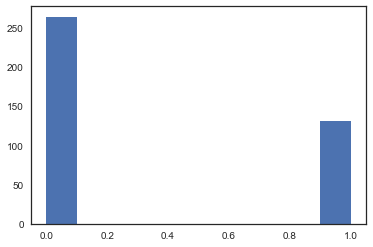

In [823]:
plt.hist(Y['G'],bins=10)
plt.show()

In [824]:
dta_2['G']=Y
dta_2.head()

,Medu_1,Medu_2,Medu_3,Mjob_teacher,schoolsup_yes,Walc_4,health_3,goout_3,G
0,0,0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,1,1,0
2,1,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0


In [825]:
dta_2.groupby('Medu_1')['G'].value_counts()

Medu_1  G
0       0    213
        1    123
1       0     51
        1      8
Name: G, dtype: int64

In [826]:
dta_2.groupby('Medu_2')['G'].value_counts()

Medu_2  G
0       0    189
        1    103
1       0     75
        1     28
Name: G, dtype: int64

In [827]:
dta_2.groupby('Medu_3')['G'].value_counts()

Medu_3  G
0       0    195
        1    101
1       0     69
        1     30
Name: G, dtype: int64

In [828]:
dta_2.groupby('Mjob_teacher')['G'].value_counts()

Mjob_teacher  G
0             0    228
              1    109
1             0     36
              1     22
Name: G, dtype: int64

In [829]:
dta_2.groupby('schoolsup_yes')['G'].value_counts()

schoolsup_yes  G
0              0    218
               1    126
1              0     46
               1      5
Name: G, dtype: int64

In [830]:
dta_2.groupby('Walc_4')['G'].value_counts()

Walc_4  G
0       0    222
        1    122
1       0     42
        1      9
Name: G, dtype: int64

In [831]:
dta_2.groupby('health_3')['G'].value_counts()

health_3  G
0         0    193
          1    111
1         0     71
          1     20
Name: G, dtype: int64

In [832]:
dta_2.groupby('goout_3')['G'].value_counts()

goout_3  G
0        0    193
         1    111
1        0     71
         1     20
Name: G, dtype: int64

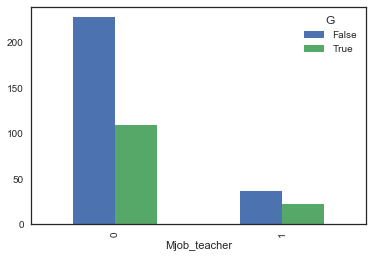

In [833]:
pd.crosstab(dta_2.Mjob_teacher,dta_2.G.astype(bool)).plot(kind='bar')
plt.show()

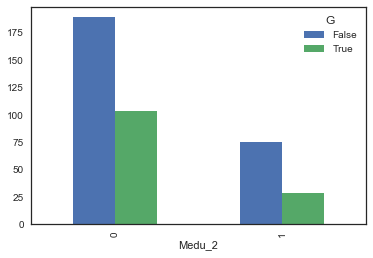

In [834]:
pd.crosstab(dta_2['Medu_2'],dta_2['G'].astype(bool)).plot(kind='bar')
plt.show()

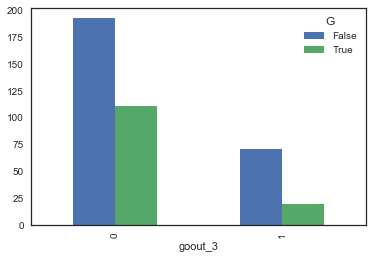

In [835]:
pd.crosstab(dta_2.goout_3,dta_2.G.astype(bool)).plot(kind='bar')
plt.show()

In [836]:
dta_2.head()

,Medu_1,Medu_2,Medu_3,Mjob_teacher,schoolsup_yes,Walc_4,health_3,goout_3,G
0,0,0,0,0,1,0,1,1,0
1,1,0,0,0,0,0,1,1,0
2,1,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0


## recursive feature elimination

In [837]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

from sklearn.preprocessing import MinMaxScaler

colnames=dta.columns
lr = LinearRegression(normalize=True)
lr.fit(dta,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(dta,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

In [838]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)


In [839]:
ranks

{'RFE': {'Dalc_2': 0.28999999999999998,
  'Dalc_3': 0.27000000000000002,
  'Dalc_4': 0.44,
  'Dalc_5': 0.25,
  'Fedu_1': 0.02,
  'Fedu_2': 0.029999999999999999,
  'Fedu_3': 0.20999999999999999,
  'Fedu_4': 0.47999999999999998,
  'Fjob_U': 0.92000000000000004,
  'Medu_1': 0.87,
  'Medu_2': 0.85999999999999999,
  'Medu_3': 0.83999999999999997,
  'Medu_4': 0.82999999999999996,
  'Mjob_health': 0.63,
  'Mjob_other': 0.38,
  'Mjob_services': 0.16,
  'Mjob_teacher': 0.76000000000000001,
  'Walc_2': 0.46000000000000002,
  'Walc_3': 0.62,
  'Walc_4': 0.81000000000000005,
  'Walc_5': 0.23999999999999999,
  'absences': 0.0,
  'activities_yes': 0.33000000000000002,
  'address_U': 0.94999999999999996,
  'age': 0.11,
  'failures_1': 0.75,
  'failures_2': 0.78000000000000003,
  'failures_3': 1.0,
  'famrel_2': 0.56000000000000005,
  'famrel_3': 0.52000000000000002,
  'famrel_4': 0.48999999999999999,
  'famrel_5': 0.51000000000000001,
  'famsup_yes': 0.56999999999999995,
  'freetime_2': 0.34999999999

In [840]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "     \t      ".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "         \t     ".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	RFE     	      Mean
age	0.11         	     0.11
absences	0.0         	     0.0
address_U	0.95         	     0.95
school_MS	0.13         	     0.13
sex_M	0.68         	     0.68
nursery_yes	0.19         	     0.19
Medu_1	0.87         	     0.87
Medu_2	0.86         	     0.86
Medu_3	0.84         	     0.84
Medu_4	0.83         	     0.83
Fedu_1	0.02         	     0.02
Fedu_2	0.03         	     0.03
Fedu_3	0.21         	     0.21
Fedu_4	0.48         	     0.48
Mjob_health	0.63         	     0.63
Mjob_other	0.38         	     0.38
Mjob_services	0.16         	     0.16
Mjob_teacher	0.76         	     0.76
Fjob_U	0.92         	     0.92
reason_home	0.3         	     0.3
reason_other	0.43         	     0.43
reason_reputation	0.41         	     0.41
guadian_mother	0.1         	     0.1
guadian_other	0.05         	     0.05
traveltime_2	0.17         	     0.17
traveltime_3	0.59         	     0.59
traveltime_4	0.7         	     0.7
studytime_2	0.14         	     0.14
studytime_3	0.67         	  

In [841]:
# if we look at the RFE ranks the first 15 are almost what we got for Linear regression interpretation
# hence linear regression is good with cross val of logistic regression

# lets select all the features with RFE above 75 %...
#  ...i.e  

In [842]:
dta_3=dta.drop(['age', 'absences',  'school_MS', 'sex_M', 'nursery_yes',
        'Fedu_1', 'Fedu_2', 'Fedu_3',
       'Fedu_4', 'Mjob_health', 'Mjob_other', 'Mjob_services', 
        'reason_home', 'reason_other', 'reason_reputation',
       'guadian_mother', 'guadian_other', 'traveltime_2', 'traveltime_3',
       'traveltime_4', 'studytime_2', 'studytime_3', 'studytime_4',
       'famsup_yes',
       'paid_yes', 'activities_yes','internet_yes',
       'romantic_yes', 'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5',
       'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5', 'Dalc_2',
       'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_2', 'Walc_3',  'Walc_5',
       'health_2', 'health_5', 'goout_2', 
       'goout_5'],axis=1)

In [843]:
dta_3.head()

,address_U,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,Fjob_U,failures_1,failures_2,failures_3,schoolsup_yes,higher_yes,Walc_4,health_3,health_4,goout_3,goout_4
0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
2,1,1,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [844]:
# applying Linear regression

import statsmodels.formula.api as smf
model_3=smf.ols(formula='y~  address_U +Medu_1 +Medu_2 + Medu_3 \
        + Mjob_teacher + Fjob_U + failures_1 +failures_2 + failures_3 \
        +  schoolsup_yes +higher_yes   \
        + Walc_4+ health_3 + health_4\
      +goout_3 +goout_4 ',data=dta_3).fit()


In [845]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     6.866
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           6.20e-12
Time:                        19:59:23   Log-Likelihood:                -221.35
No. Observations:                 395   AIC:                             470.7
Df Residuals:                     381   BIC:                             526.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4422      0.125      3.532      0.000       0.196       0.688
address_U         0.0367      0.027      1.378      0.169      -0.016       0.089
Medu_1           -0.3064      0.078     -3.950      0.000      -0.459      -0.154
Medu_2           -0.2318      0.065     -3.553      0.000      -0.360      -0.104
Medu_3           -0.1843      0.065     -2.856      0.005      -0.311      -0.057
Mjob_teacher     -0.1814      0.073     -2.471      0.014      -0.326      -0.037
Fjob_U            0.0367      0.027      1.378      0.169      -0.016       0.089
failures_1       -0.1629      0.068     -2.384      0.018      -0.297      -0.029
failures_2       -0.2186      0.109     -2.006      0.046      -0.433      -0.004
failures_3       -0.2619      0.119     -2.196      0.029      -0.496      -0.027
schoolsup_yes    -0.2801      0.065     -4.286      0.000      -0.409      -0.152
higher_yes        0.1601      0.106      1.512      0.131      -0.048       0.368
Walc_4           -0.1967      0.066     -2.975      0.003      -0.327      -0.067
health_3         -0.0674      0.027     -2.490      0.013      -0.121      -0.014
health_4         -0.0216      0.031     -0.707      0.480      -0.082       0.038
goout_3          -0.0674      0.027     -2.490      0.013      -0.121      -0.014
goout_4          -0.0216      0.031     -0.707      0.480      -0.082       0.038
==============================================================================
Omnibus:                      152.691   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.834
Skew:                           0.450   Prob(JB):                     4.50e-08
Kurtosis:                       1.884   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.75e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [846]:
dta_3.drop(['address_U', 'Fjob_U','higher_yes','health_4','goout_4'],axis=1,inplace=True)

In [847]:
dta_3.head()

,Medu_1,Medu_2,Medu_3,Medu_4,Mjob_teacher,failures_1,failures_2,failures_3,schoolsup_yes,Walc_4,health_3,goout_3
0,0,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,1,1,0,1,1
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [848]:
from patsy import dmatrices
y_lo,x_lo= dmatrices('y~Medu_1 + Medu_2 + Medu_3 + Medu_4 +  Mjob_teacher+ failures_1 + failures_2 + failures_3 + schoolsup_yes + Walc_4 + health_3 + goout_3',dta_3,return_type='dataframe')

In [849]:
model = LogisticRegression()
model=model.fit(x_lo,y_lo)

D:\data_science\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [850]:
model.score(x_lo,y_lo)

0.70632911392405062

In [851]:
y_lo.mean()

y    0.331646
dtype: float64

In [852]:
X_train,X_test,y_train,y_test= train_test_split(x_lo,y_lo,test_size=0.3,random_state=0)


model2 = LogisticRegression()

model2.fit(X_train,y_train)

D:\data_science\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [853]:
predicted = model2.predict(X_test)
predicted.mean()

0.22689075630252101

In [854]:
predicted.sum()

27.0

In [855]:
probs=model2.predict_proba(X_test)
probs

array([[ 0.49855375,  0.50144625],
       [ 0.55190772,  0.44809228],
       [ 0.30965357,  0.69034643],
       [ 0.49855375,  0.50144625],
       [ 0.30965357,  0.69034643],
       [ 0.85070027,  0.14929973],
       [ 0.82843889,  0.17156111],
       [ 0.30965357,  0.69034643],
       [ 0.69421219,  0.30578781],
       [ 0.54667461,  0.45332539],
       [ 0.69421219,  0.30578781],
       [ 0.92314014,  0.07685986],
       [ 0.49855375,  0.50144625],
       [ 0.92377798,  0.07622202],
       [ 0.55190772,  0.44809228],
       [ 0.30965357,  0.69034643],
       [ 0.59703136,  0.40296864],
       [ 0.78806963,  0.21193037],
       [ 0.30965357,  0.69034643],
       [ 0.529585  ,  0.470415  ],
       [ 0.59703136,  0.40296864],
       [ 0.86751661,  0.13248339],
       [ 0.55190772,  0.44809228],
       [ 0.85070027,  0.14929973],
       [ 0.85070027,  0.14929973],
       [ 0.30965357,  0.69034643],
       [ 0.55190772,  0.44809228],
       [ 0.71390639,  0.28609361],
       [ 0.30965357,

In [856]:
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))


0.697478991597
0.738621794872


In [857]:
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[68 12]
 [24 15]]
             precision    recall  f1-score   support

        0.0       0.74      0.85      0.79        80
        1.0       0.56      0.38      0.45        39

avg / total       0.68      0.70      0.68       119



In [858]:

# well using best 10 features from FRE our accuracy has dropped down
# hence model_2 with linear and logistic regression is better



## linear regression evaluation of model

In [859]:
lm=LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test) 


from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))



MAE: 0.387623828797
MSE: 0.193203931984
RMSE: 0.439549692281


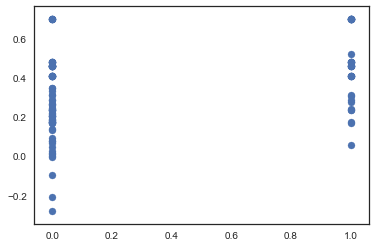

In [860]:
plt.scatter(y_test,predictions)
plt.show()



### well using best 10 features from FRE our accuracy has dropped down
### hence model_2 with linear and logistic regression is better